<a href="https://www.kaggle.com/code/handandegerli/content-based-recommendation?scriptVersionId=182357967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#############################
# Content Based Recommendation (İçerik Temelli Tavsiye)
#############################

#############################
# Film Overview'larına Göre Tavsiye Geliştirme
#############################

# 1. TF-IDF Matrisinin Oluşturulması
# 2. Cosine Similarity Matrisinin Oluşturulması
# 3. Benzerliklere Göre Önerilerin Yapılması
# 4. Çalışma Scriptinin Hazırlanması

#################################
# 1. TF-IDF Matrisinin Oluşturulması
#################################

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# https://www.kaggle.com/rounakbanik/the-movies-dataset

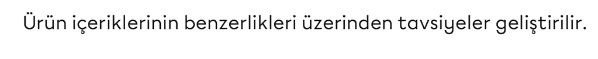

metinleri vektorlere cevirip üzerinden hesaplamalar yaparız.Aşağıdaki şekilde similaritysine ve öclide ine bakarız.

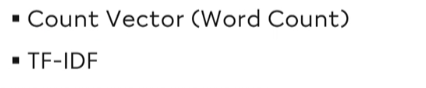

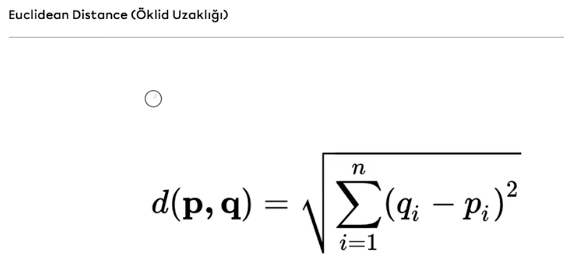

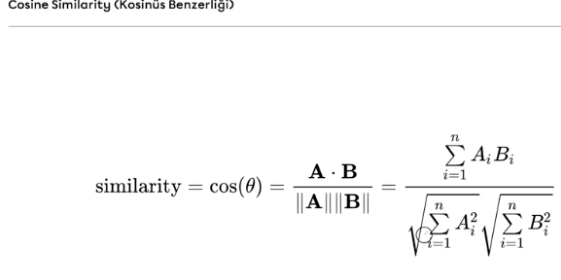

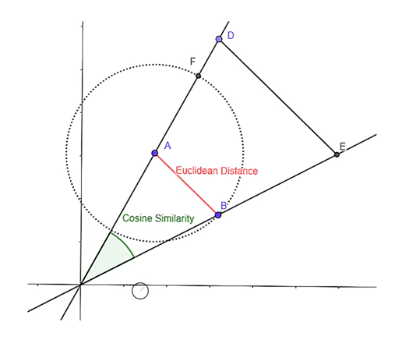

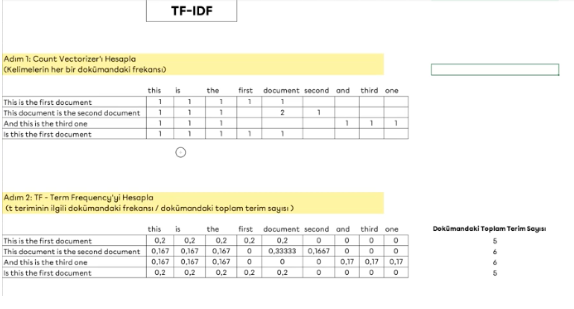
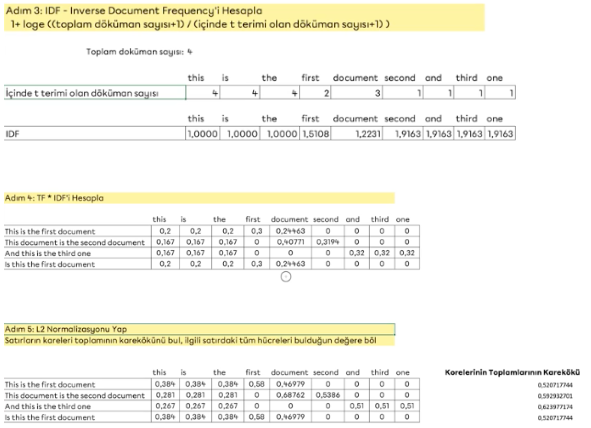


**İş Problemi**

Yeni kurulmuş bir online film izleme platformu (hdfilmcehennemi48.gen.tr) kullanıcılarına film önerilerinde bulunmak istemektedir.

Kullanıcıların login oranı çok düşük olduğu için kullanıcı alışkanlıklarını toplayamamaktadır. Bu sebeple iş birlikçi filtreleme yöntemleri ile ürün önerileri geliştirememektedir.

Fakat kullanıcıların tarayıcıdaki izlerinden hangi filmleri izlediklerini bilmektedir. Bu bilgiye göre film önerilerinde bulununuz.

overview degişkeni description içermektedir.

In [2]:
df = pd.read_csv("/kaggle/input/dataset-for-cbr/movies_metadata.csv", low_memory=False)  # DtypeWarning kapamak icin

In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.shape

(45466, 24)

In [5]:
df["overview"].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [6]:
tfidf = TfidfVectorizer(stop_words="english")
#an, and, or gb ölçüm değeri taşımayan kelimeleri çıkar diyoruz stop_words ile

In [7]:
# df[df['overview'].isnull()]
df['overview'] = df['overview'].fillna('') 
#nan leri boslukla degiştiriyoruz. silmek yerine

In [8]:
tfidf_matrix = tfidf.fit_transform(df['overview'])
#fit işlemi yapar ama transform ile kalıcı ol. degıstırır, donusturur.

In [9]:
tfidf_matrix.shape

(45466, 75827)

In [10]:
df['title'].shape

(45466,)

In [11]:
tfidf.get_feature_names_out()

array(['00', '000', '000km', ..., '첫사랑', 'ﬁrst', 'ﬁve'], dtype=object)

In [12]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
#farklı senaryolarda farklı metric biz tf-idf kul.
#################################
# 2. Cosine Similarity Matrisinin Oluşturulması
#################################

cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

In [14]:
cosine_sim.shape

(45466, 45466)

In [15]:
cosine_sim[1]
#1. filmin diğer but filmlerle benzerlik sayıları gelir

array([0.01504121, 1.        , 0.04681953, ..., 0.        , 0.02198641,
       0.00929411])

In [16]:
#################################
# 3. Benzerliklere Göre Önerilerin Yapılması
#################################

indices = pd.Series(df.index, index=df['title'])
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45461
Century of Birthing            45462
Betrayal                       45463
Satan Triumphant               45464
Queerama                       45465
Length: 45466, dtype: int64

In [17]:
indices.index.value_counts()

title
Cinderella              11
Hamlet                   9
Alice in Wonderland      9
Beauty and the Beast     8
Les Misérables           8
                        ..
Cluny Brown              1
Babies                   1
The Green Room           1
Captain Conan            1
Queerama                 1
Name: count, Length: 42277, dtype: int64

In [18]:
indices["Cinderella"]

title
Cinderella      993
Cinderella    13076
Cinderella    23507
Cinderella    23518
Cinderella    28391
Cinderella    28664
Cinderella    34254
Cinderella    35593
Cinderella    35595
Cinderella    41074
Cinderella    45406
dtype: int64

In [19]:
indices = indices[~indices.index.duplicated(keep='last')]
#en sonda çekilen filmi tutmak için last

In [20]:
indices["Cinderella"]

45406

In [21]:
indices["Sherlock Holmes"]

35116

In [22]:
movie_index = indices["Sherlock Holmes"]

In [23]:
cosine_sim[movie_index]

array([0.        , 0.00392837, 0.00476764, ..., 0.        , 0.0067919 ,
       0.        ])

In [24]:
similarity_scores = pd.DataFrame(cosine_sim[movie_index],
                                 columns=["score"])

In [25]:
movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index
#0. index gözlemin kendisi

In [26]:
df['title'].iloc[movie_indices]

34737    Приключения Шерлока Холмса и доктора Ватсона: ...
14821                                    The Royal Scandal
34750    The Adventures of Sherlock Holmes and Doctor W...
9743                           The Seven-Per-Cent Solution
4434                                        Without a Clue
29706                       How Sherlock Changed the World
18258                   Sherlock Holmes: A Game of Shadows
24665     The Sign of Four: Sherlock Holmes' Greatest Case
6432                   The Private Life of Sherlock Holmes
29154                          Sherlock Holmes in New York
Name: title, dtype: object

In [27]:
#################################
# 4. Çalışma Scriptinin Hazırlanması
#################################

def content_based_recommender(title, cosine_sim, dataframe):
    # index'leri olusturma
    indices = pd.Series(dataframe.index, index=dataframe['title'])
    indices = indices[~indices.index.duplicated(keep='last')]
    # title'ın index'ini yakalama
    movie_index = indices[title]
    # title'a gore benzerlik skorlarını hesapalama
    similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
    # kendisi haric ilk 10 filmi getirme
    movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index
    return dataframe['title'].iloc[movie_indices]



In [28]:
content_based_recommender("Sherlock Holmes", cosine_sim, df)

content_based_recommender("The Matrix", cosine_sim, df)

content_based_recommender("The Godfather", cosine_sim, df)

content_based_recommender('The Dark Knight Rises', cosine_sim, df)

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object

In [29]:
def calculate_cosine_sim(dataframe):
    tfidf = TfidfVectorizer(stop_words='english')
    dataframe['overview'] = dataframe['overview'].fillna('')
    tfidf_matrix = tfidf.fit_transform(dataframe['overview'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim


#cosine_sim = calculate_cosine_sim(df)
#content_based_recommender('The Dark Knight Rises', cosine_sim, df)
#sql formatında bir arada tutup oneri olarak direk çıkartılacak
# 1 [90, 12, 23, 45, 67]
# 2 [90, 12, 23, 45, 67]
# 3